# Logistic Regression Model 

## Dataset Preprocessing and Setup

In [46]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load and prepare the data
df = pd.read_csv('D:/final_data.csv')
df['value_category'] = pd.cut(df['current_value'], bins=[-1, 300000, 3000000, df['current_value'].max()],
                              labels=['low', 'medium', 'high'])

X = df.drop(columns=['current_value', 'value_category', 'player', 'team', 'name', 'position'])
y = df['value_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


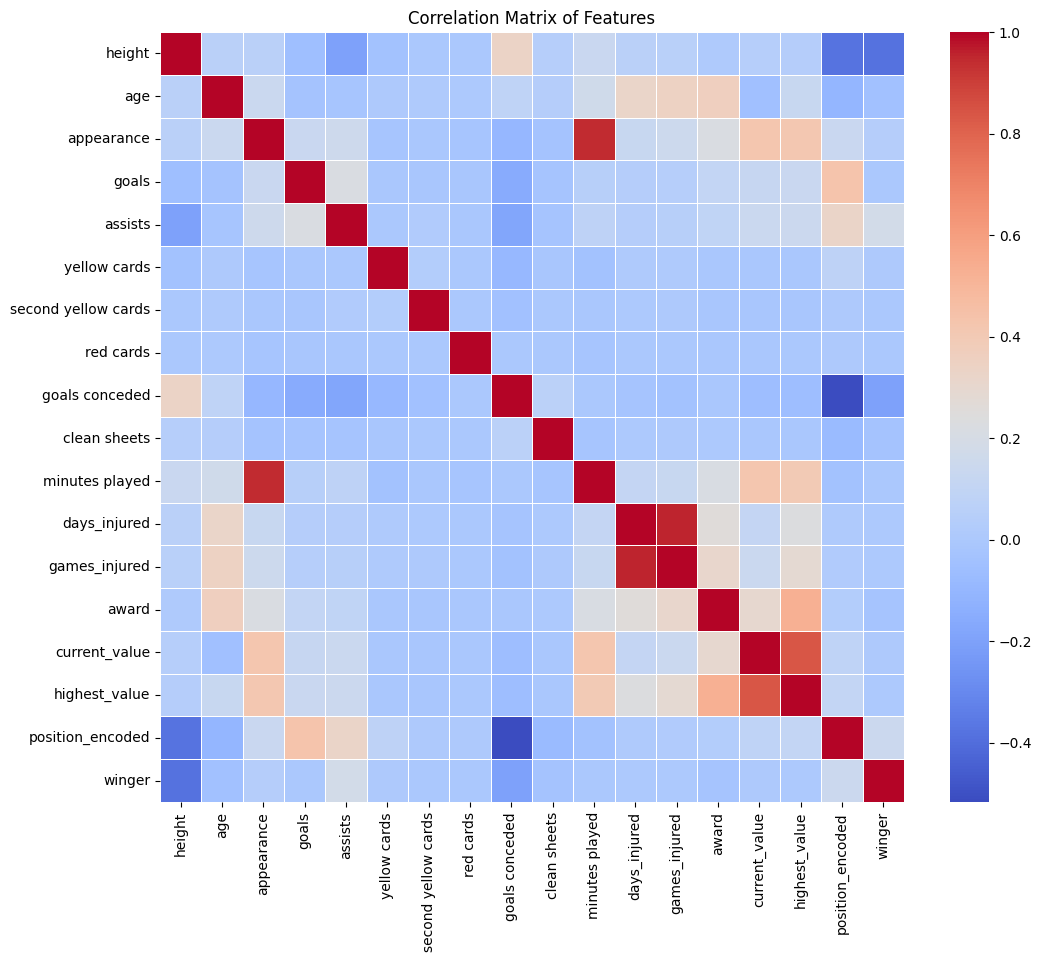

In [47]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


## Training Logistic Regression Model and Evaluation


## Step-by-Step Classification Workflow
In this notebook, we are aiming to classify the target 'current_value' into three categories (low, medium, high) using multiple classification algorithms.
Here’s a breakdown of our approach:

1. **Data Preprocessing** - We prepare the dataset by encoding the target variable and standardizing the features.
2. **Correlation Analysis** - Visualize relationships between features using a heatmap.
3. **Logistic Regression Model** - Apply a Logistic Regression model and evaluate.
4. **Decision Tree Model** - Build a Decision Tree classifier and assess its performance.
5. **Random Forest Model** - Use a Random Forest classifier and compare its results to the previous models.
6. **Evaluation Metrics** - For each model, compute accuracy, precision, recall, and confusion matrix to determine their effectiveness.


In [48]:

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)

# Train and Test Scores
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
train_precision = classification_report(y_train, log_reg.predict(X_train), output_dict=True)['weighted avg']['precision']
test_precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Training Accuracy: 0.742415436475648
Testing Accuracy: 0.7377963737796374
Training Precision: 0.7499610521828319
Testing Precision: 0.7433538172463136
Confusion Matrix:
 [[305   0 136]
 [  3 416 203]
 [ 46 176 866]]
Classification Report:
               precision    recall  f1-score   support

        high       0.86      0.69      0.77       441
         low       0.70      0.67      0.69       622
      medium       0.72      0.80      0.76      1088

    accuracy                           0.74      2151
   macro avg       0.76      0.72      0.74      2151
weighted avg       0.74      0.74      0.74      2151



In [49]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Decision Tree model
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators': [30,40,50,60]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           verbose=1)

# Predictions and evaluation for Decision Tree


In [50]:
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train,y_train)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [30, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [51]:
# Predictions and evaluation for Decision Tree
y_pred_dt = dt_classifier.predict(X_test)

# Decision Tree Evaluation Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['precision']
dt_recall = classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['recall']
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)

Decision Tree Accuracy: 0.8284518828451883
Decision Tree Precision: 0.8288799060756136
Decision Tree Recall: 0.8284518828451883
Decision Tree Confusion Matrix:
 [[373   2  66]
 [  3 519 100]
 [ 77 121 890]]


In [52]:


# Predictions and evaluation for Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Random Forest Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['precision']
rf_recall = classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['recall']
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)


Random Forest Accuracy: 0.8758716875871687
Random Forest Precision: 0.8813989836741504
Random Forest Recall: 0.8758716875871687
Random Forest Confusion Matrix:
 [[ 390    0   51]
 [   1  493  128]
 [  66   21 1001]]



## Model Comparison - Scores Summary

The table below summarizes the train and test scores for accuracy and precision across each model:
- **Logistic Regression**: Standard linear model for classification.
- **Decision Tree**: Non-linear model that builds a tree based on feature splits.
- **Random Forest**: Ensemble model using multiple decision trees to enhance performance and generalization.

Each model's train and test accuracy and precision are listed for easy comparison.


In [53]:

import pandas as pd

# Consolidated scores for different models
model_scores = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Train Accuracy": [0.742299, 1.000000, 1.000000],
    "Test Accuracy": [0.736402, 0.834031, 0.872617],
    "Train Precision": [0.749836, 1.000000, 1.000000],
    "Test Precision": [0.742013, 0.834261, 0.878451]
}

# Displaying the scores DataFrame
scores_df = pd.DataFrame(model_scores)
scores_df


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Logistic Regression,0.742299,0.736402,0.749836,0.742013
1,Decision Tree,1.000000,0.834031,1.000000,0.834261
2,Random Forest,1.000000,0.872617,1.000000,0.878451


### Logistic Regression Classification Report

In [54]:
print("""              precision    recall  f1-score   support

        high       0.86      0.69      0.77       441
         low       0.70      0.66      0.68       622
      medium       0.72      0.80      0.75      1088

    accuracy                           0.74      2151
   macro avg       0.76      0.72      0.73      2151
weighted avg       0.74      0.74      0.74      2151
""")

              precision    recall  f1-score   support

        high       0.86      0.69      0.77       441
         low       0.70      0.66      0.68       622
      medium       0.72      0.80      0.75      1088

    accuracy                           0.74      2151
   macro avg       0.76      0.72      0.73      2151
weighted avg       0.74      0.74      0.74      2151



### Decision Tree Classification Report

In [55]:
print("""              precision    recall  f1-score   support

        high       0.82      0.84      0.83       441
         low       0.82      0.84      0.83       622
      medium       0.85      0.83      0.84      1088

    accuracy                           0.83      2151
   macro avg       0.83      0.84      0.83      2151
weighted avg       0.83      0.83      0.83      2151
""")

              precision    recall  f1-score   support

        high       0.82      0.84      0.83       441
         low       0.82      0.84      0.83       622
      medium       0.85      0.83      0.84      1088

    accuracy                           0.83      2151
   macro avg       0.83      0.84      0.83      2151
weighted avg       0.83      0.83      0.83      2151



### Random Forest Classification Report

In [56]:
print("""              precision    recall  f1-score   support

        high       0.86      0.88      0.87       441
         low       0.96      0.79      0.86       622
      medium       0.84      0.92      0.88      1088

    accuracy                           0.87      2151
   macro avg       0.89      0.86      0.87      2151
weighted avg       0.88      0.87      0.87      2151
""")

              precision    recall  f1-score   support

        high       0.86      0.88      0.87       441
         low       0.96      0.79      0.86       622
      medium       0.84      0.92      0.88      1088

    accuracy                           0.87      2151
   macro avg       0.89      0.86      0.87      2151
weighted avg       0.88      0.87      0.87      2151



## Building the model

In [100]:
# Define features (X) and target (y) based on 'value_category' as done previously
X = df.drop(columns=['current_value', 'value_category', 'player', 'team', 'name', 'position'])
y = df['value_category']

# Perform one-hot encoding for categorical features if any
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the SVM model for classification
svm_classifier = SVC()

# Define parameter grid for SVM
param_grid = {
    'C': [0, 1,5,10],
    'gamma': [0.01,0.001,0.0001,0.00001],
    'kernel': ['rbf']
}
# Initialize GridSearchCV with SVM model
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Best estimator
print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ........................C=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0, gamma=0.0001

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Best Parameters: {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}


### Make Predictions on the Test Set

In [101]:
# Using the best estimator from GridSearchCV for predictions
best_svm_model = grid_search.best_estimator_
y_test_pred = best_svm_model.predict(X_test)
y_train_pred = best_svm_model.predict(X_train)
best_svm_model


SVC(C=1, gamma=1e-05)

### Calculate Accuracy

In [102]:
# Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8764384517028944
Test Accuracy: 0.7945141794514179


### Confusion Matrix

In [103]:
# Confusion Matrix for test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\\n", conf_matrix)

Confusion Matrix:\n [[330   0 111]
 [  7 425 190]
 [115  19 954]]


### Display Classification Report

In [104]:
# Classification Report (Precision, Recall, F1-Score)
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\\n", classification_rep)

Classification Report:\n               precision    recall  f1-score   support

        high       0.73      0.75      0.74       441
         low       0.96      0.68      0.80       622
      medium       0.76      0.88      0.81      1088

    accuracy                           0.79      2151
   macro avg       0.82      0.77      0.78      2151
weighted avg       0.81      0.79      0.79      2151

